In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [63]:
# Step 1: Load the data
# Replace 'your_data.csv' with the actual file path
data=pd.read_excel("Mall_Customers.xlsx")

In [64]:
# Example columns: 'CustomerID', 'TotalSpend', 'NumberOfTransactions', 'AverageTransactionValue'
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [65]:
# Step 1: Check columns
print(data.columns)

# Step 2: Verify column names
required_columns = ['TotalSpend', 'NumberOfTransactions', 'AverageTransactionValue']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    features = data[required_columns]


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Missing columns: ['TotalSpend', 'NumberOfTransactions', 'AverageTransactionValue']


In [66]:
print(scaled_features)


[[-1.22474487 -0.33968311 -1.11666374]
 [ 1.22474487  1.35873244 -0.19319762]
 [ 0.         -1.01904933  1.30986136]]


In [67]:
print(inertia)


[9.0, 3.924781251844566, 0.0]


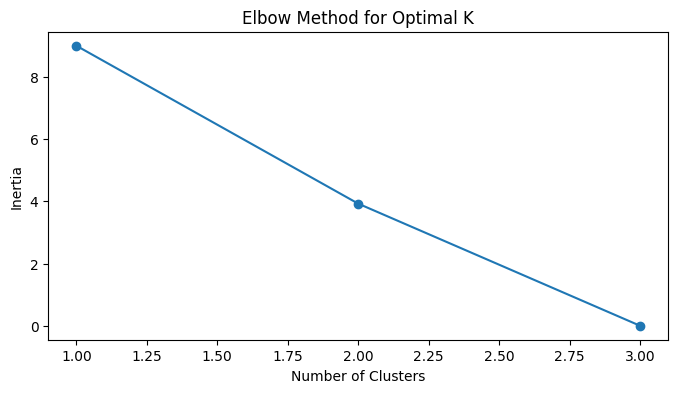

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [69]:
print(data)


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'TotalSpend': [100, 200, 150],
    'NumberOfTransactions': [10, 15, 8],
    'AverageTransactionValue': [10, 13.33, 18.75]
})

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TotalSpend', 'NumberOfTransactions', 'AverageTransactionValue']])

# Dynamically determine optimal_k
optimal_k = min(4, len(scaled_features))
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data)


   TotalSpend  NumberOfTransactions  AverageTransactionValue  Cluster
0         100                    10                    10.00        2
1         200                    15                    13.33        0
2         150                     8                    18.75        1


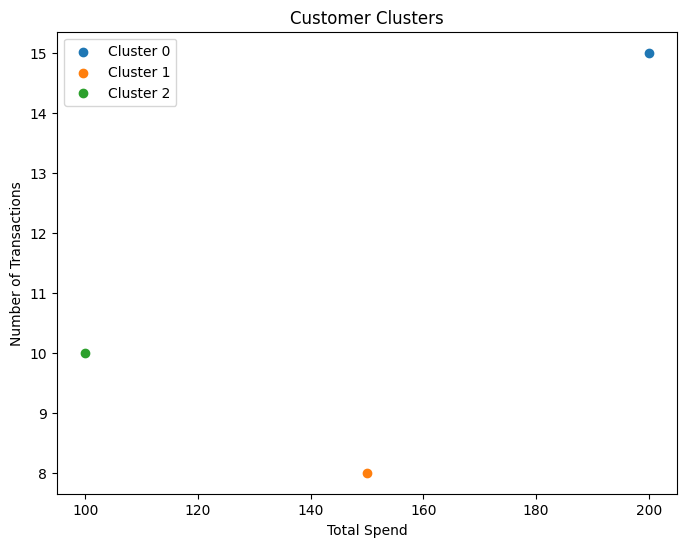

In [71]:
# Step 6: Visualize the clusters (for 2D or 3D data)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['TotalSpend'], cluster_data['NumberOfTransactions'], label=f'Cluster {cluster}')
plt.xlabel('Total Spend')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Customer Clusters')
plt.show()